# Conduction Power

In [1]:
import numpy as np
import pandas as pd
import mpld3
import matplotlib.pyplot as plt

mpld3.enable_notebook()

In [2]:
df_waves = pd.read_csv('lossesHalfBridge.csv')
df_waves = df_waves.set_index('Time')

time   = df_waves.index
pwm_s1 = df_waves['Vsa1']
Iout   = df_waves['Iout']

In [3]:
from halfBridgeModule import rmsValue, conductionLosesHalfBridge

## Generating the signals for test

In [4]:
Vce_IGBT = 2.5
Vf_Diode = 3.8e-3
Rce_IGBT = 1.8
Rf_Diode = 3e-3

print('WARNING: Vce_IGBT, Vf_Diode, Rce_IGBT, Rf_Diode are fantasy values!')

P_cd = conductionLosesHalfBridge(pwm_s1, Iout, Vce_IGBT, Vf_Diode, Rce_IGBT, Rf_Diode)
P_cd

{'S1': 162.5986695542171,
 'S2': 162.53637031090966,
 'D1': 0.05246942042374049,
 'D2': 0.052518766271143366}

## Resultado Final, as perdas em comutação para cada uma dos semicondutores, em Watts

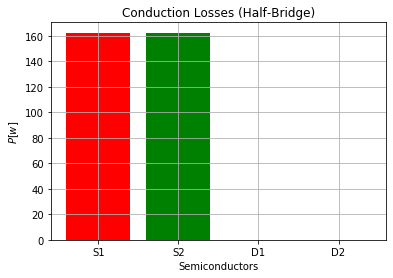

In [5]:
mpld3.disable_notebook()

x = np.arange(4)
plt.bar(x, P_cd.values(), color =['red', 'green', 'yellow', 'blue'])
plt.xticks(x, P_cd.keys())
plt.ylabel('$P [w]$')
plt.xlabel('Semiconductors')
plt.grid()
plt.title('Conduction Losses (Half-Bridge)')
plt.show()

mpld3.enable_notebook()